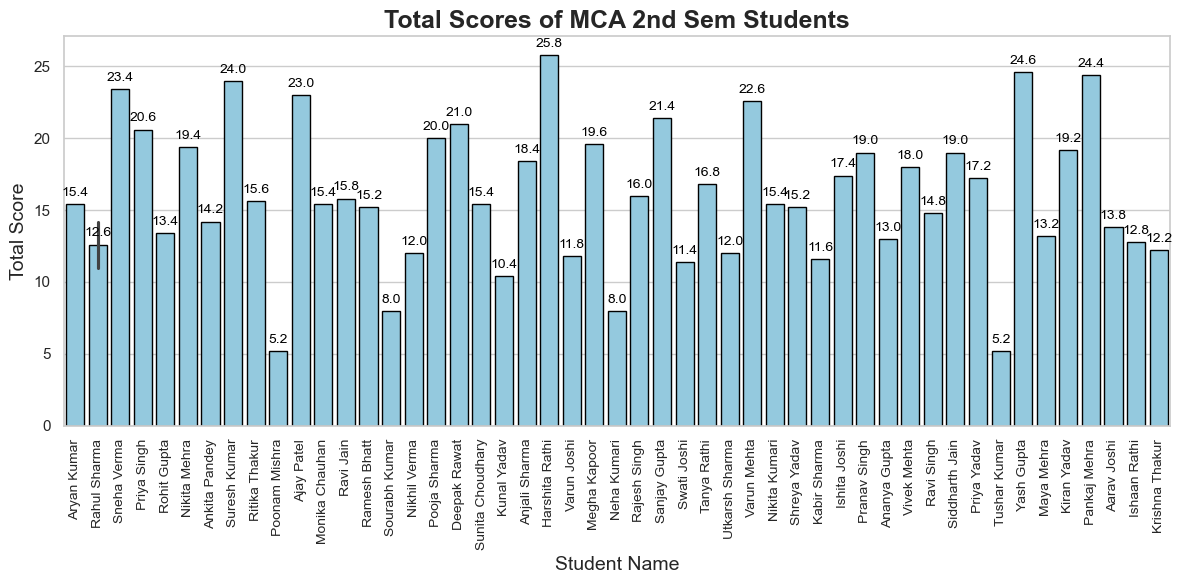

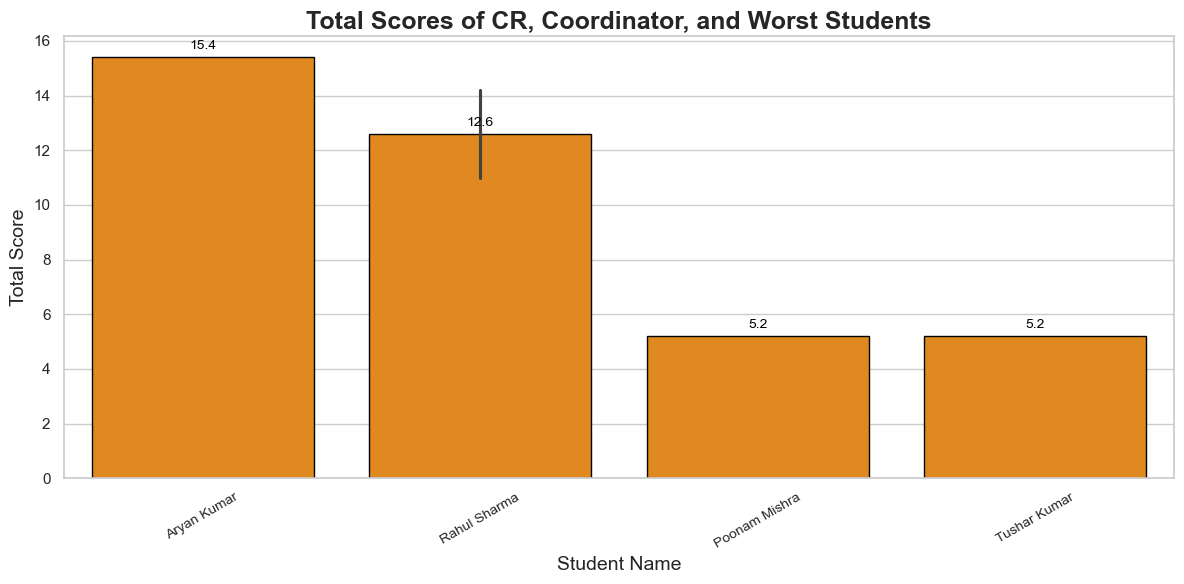


Detailed Data for CR, Coordinator and Worst Students:
             Name  GetUpTime  StudyHours  FitnessHours  Personality  \
0     Aryan Kumar          7           6           1.0            7   
1    Rahul Sharma          8           7           1.5            6   
45   Rahul Sharma          9           6           1.3            6   
9   Poonam Mishra          9           3           1.1            6   
41   Tushar Kumar          9           3           1.1            6   

    TotalScore         Role  
0         15.4           CR  
1         14.2  Coordinator  
45        11.0  Coordinator  
9          5.2      Student  
41         5.2      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- PersonalityPractice: 8


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Aryan Kumar", "Rahul Sharma", "Sneha Verma", "Priya Singh", "Rohit Gupta",
        "Nikita Mehra", "Ankita Pandey", "Suresh Kumar", "Ritika Thakur",
        "Poonam Mishra", "Ajay Patel", "Monika Chauhan", "Ravi Jain", "Ramesh Bhatt",
        "Sourabh Kumar", "Nikhil Verma", "Pooja Sharma", "Deepak Rawat", "Sunita Choudhary",
        "Kunal Yadav", "Anjali Sharma", "Harshita Rathi", "Varun Joshi", "Megha Kapoor",
        "Neha Kumari", "Rajesh Singh", "Sanjay Gupta", "Swati Joshi", "Tanya Rathi",
        "Utkarsh Sharma", "Varun Mehta", "Nikita Kumari", "Shreya Yadav", "Kabir Sharma",
        "Ishita Joshi", "Pranav Singh", "Ananya Gupta", "Vivek Mehta", "Ravi Singh",
        "Siddharth Jain", "Priya Yadav", "Tushar Kumar", "Yash Gupta", "Maya Mehra",
        "Kiran Yadav", "Rahul Sharma", "Pankaj Mehra", "Aarav Joshi", "Ishaan Rathi",
        "Krishna Thakur"
    ],
    'GetUpTime': [7, 8, 6, 6, 7, 8, 7, 8, 7, 9, 6, 9, 8, 7, 9, 8, 7, 8, 9, 6, 8, 7, 9, 8, 6, 8, 9, 8, 7, 9, 8, 7, 8, 9, 6, 8, 9, 8, 7, 8, 6, 9, 8, 6, 8, 9, 8, 7, 8, 9],
    'StudyHours': [6, 7, 8, 5, 6, 7, 5, 8, 4, 3, 6, 7, 8, 4, 3, 6, 5, 8, 7, 4, 6, 8, 5, 7, 3, 5, 7, 4, 8, 3, 7, 6, 8, 3, 6, 5, 4, 8, 7, 5, 6, 3, 8, 4, 7, 6, 8, 5, 3, 7],
    'FitnessHours': [1.0, 1.5, 1.2, 1.0, 1.5, 1.1, 1.3, 1.0, 1.4, 1.1, 1.3, 1.1, 1.4, 1.2, 1.0, 1.3, 1.2, 1.0, 1.1, 1.3, 1.5, 1.4, 1.1, 1.2, 1.0, 1.2, 1.1, 1.3, 1.4, 1.5, 1.2, 1.0, 1.1, 1.3, 1.5, 1.2, 1.1, 1.0, 1.3, 1.2, 1.4, 1.1, 1.3, 1.2, 1.0, 1.3, 1.2, 1.1, 1.4, 1.0],
    'Personality': [7, 6, 8, 9, 6, 8, 7, 9, 8, 6, 9, 7, 6, 8, 7, 6, 9, 8, 7, 6, 8, 9, 7, 8, 6, 8, 9, 7, 6, 8, 9, 7, 6, 8, 7, 9, 8, 7, 6, 9, 7, 6, 9, 7, 8, 6, 9, 7, 8, 6]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (df['StudyHours'] - df['StudyHours'].min()) / (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (df['Personality'] - df['Personality'].min()) / (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']  # Update here
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Aryan Kumar", 'Role'] = 'CR'
df.loc[df['Name'] == "Rahul Sharma", 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', color='skyblue')
plt.title('Total Scores of MCA 2nd Sem Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Plot bar chart for CR, Coordinator, and worst students
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Name', y='TotalScore', data=highlighted_students, edgecolor='black', color='darkorange')
plt.title('Total Scores of CR, Coordinator, and Worst Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=30, fontsize=10)

# Annotate the bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'Personality', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'PersonalityPractice': 8,  # Updated here for personality
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")
